# Random Forest

The Random Forest algorithm is a powerful and versatile machine learning method that is used for both classification and regression tasks. As an ensemble learning model, it operates by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
But before we dive into this algorithm let's learn a bit about **Bagging** or **Bootstrap Aggregation**.

### Understanding the Bootstrap Method

The bootstrap is a powerful statistical technique for estimating a quantity from a data sample. This is easiest to understand when the quantity is a descriptive statistic, such as a mean or standard deviation.

Suppose we have a sample of 100 values (x) and want to estimate the mean of the sample.

We can calculate the mean directly from the sample as:

\[ \text{mean}(x) = \frac{1}{100} \sum x \]

However, we know that our sample is small and our mean has some error. We can improve our mean estimate using the bootstrap procedure:

1. Create many (e.g., 1000) random sub-samples of our dataset with replacement (meaning a value can be selected multiple times).
2. Calculate the mean of each sub-sample.
3. Calculate the average of all the sub-sample means and use that as our estimated mean for the data.

For instance, let's say we used 3 resamples and obtained mean values of 2.3, 4.5, and 3.3. By averaging these, we get an estimated mean of 3.367.

This process can also estimate other quantities, such as the standard deviation, and even parameters used in machine learning algorithms, like learned coefficients.

### Bootstrap Aggregation (Bagging)

Bootstrap Aggregation, commonly known as Bagging, is a straightforward yet powerful ensemble method. 

An ensemble method combines predictions from multiple machine learning algorithms to produce more accurate results than any single model could achieve on its own.

Bagging is a general technique used to reduce the variance of high-variance algorithms, such as decision trees (e.g., Classification and Regression Trees, or CART).

Decision trees are particularly sensitive to the specific data on which they are trained. If the training data changes (e.g., training on different subsets of the data), the resulting trees and their predictions can vary significantly.

Bagging involves applying the Bootstrap procedure to high-variance algorithms, typically decision trees. This helps in stabilizing the predictions and improving the overall model performance.

### Example of Bagging with the CART Algorithm

Assume we have a sample dataset of 1000 instances (x) and we are using the Classification and Regression Trees (CART) algorithm. Here's how Bagging with the CART algorithm would work:

1. Create many (e.g., 100) random sub-samples of our dataset with replacement.
2. Train a CART model on each sub-sample.
3. For a new dataset, calculate the average prediction from each model.

For example, if we had 5 bagged decision trees that made the following class predictions for an input sample: blue, blue, red, blue, and red, we would take the most frequent class and predict blue.

### Bagging with Decision Trees

When bagging with decision trees, we are less concerned about individual trees overfitting the training data. To improve efficiency and ensure variety among the trees, we typically grow individual decision trees deep (i.e., with few training samples at each leaf node) and do not prune them. These deep trees have both high variance and low bias, which are crucial characteristics for sub-models in a bagging ensemble.

A very deep decision tree tends to learn the noise in the data, leading to overfitting. This results in low bias but high variance. Pruning is usually applied to reduce overfitting in decision trees, but with bagging, we leverage the high variance of individual trees to enhance the ensemble's overall performance.

### The Edge with Random Forest 

So now we know that Decision Trees can be used in ensemble model aka with bagging technique to help in generalization and reduce variance in other terms. Then why another algorithm named Random forest? Is it any different from bagging with Decision Trees?
The answer is **yes**. Random Forest algorithm is an extension of bagging with Decision Trees, it combines bootstrap aggregation (sampling with replacement) with random feature selection for splits, which reduces the correlation between trees. 

Even with Bagging, decision trees can exhibit structural similarities, leading to high correlation in their predictions.
Combining predictions from multiple models in ensembles works best when the predictions from the sub-models are uncorrelated or only weakly correlated.

Random Forests modify the algorithm for learning sub-trees, resulting in less correlation between their predictions.

Here's how the two are different:

- **Bagged CART Algorithm:** In the standard CART algorithm, when selecting a split point, the learning algorithm considers all variables and all variable values to choose the most optimal split point.
- **Random Forest Algorithm:** The Random Forest algorithm tweaks this procedure by restricting the learning algorithm to a random sample of features to search for the split point.

This simple change reduces the correlation among the sub-trees' predictions, leading to a more robust ensemble model. <i>The random word in random forest comes from the fact that in bagging samples are made with random selection and the features that can be picked for best splitting are also selected randomly.</i>

This means that although individual trees have high variance, the ensemble output is more stable (lower variance and lower bias) due to the low correlation between the trees. This results in a more accurate and reliable model.


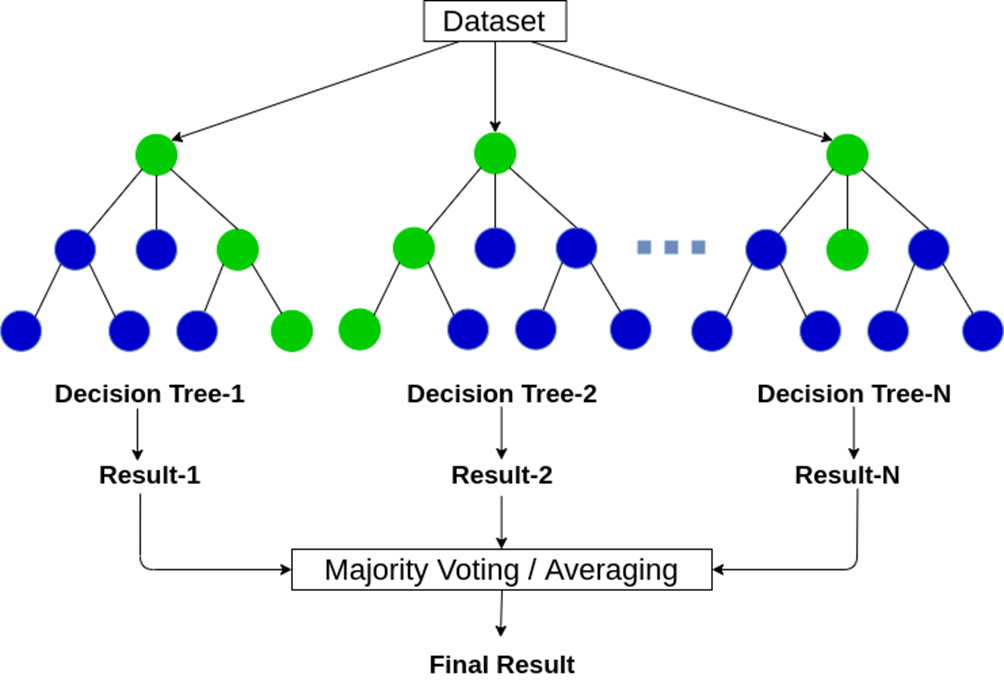

### Estimating Performance

When using bootstrap sampling from the training data, each sample leaves some data points out, known as Out-Of-Bag samples (OOB).

The performance of each model on its OOB samples, when averaged, provides an estimate of the accuracy of the bagged models. This estimate is commonly referred to as the Out-Of-Bag (OOB) estimate of performance.

These performance measures serve as reliable estimates of test error and show strong correlation with cross-validation estimates.

### Comparison: Bagging vs. Boosting

The choice between bagging and boosting depends on the available data, specific circumstances, and the nature of the problem at hand. Both techniques aim to reduce variance during the combination process, thereby enhancing accuracy and providing more stable results compared to individual models.

#### Bagging

Bagging involves randomly drawing various subsets of training data with replacement from the entire dataset. It addresses overfitting issues by averaging predictions from **independently** trained weak learners.

- **Advantages:**
  - Effective for unstable classifiers with high variance.
  - Each model receives equal weight in the final prediction.
  - Focuses on reducing variance.
  - Simple method for aggregating predictions of similar types.
  - Models are built independently.

#### Boosting

Boosting, on the other hand, sequentially builds models, with each subsequent model focusing on the errors of its predecessors. This technique aims to reduce bias by optimizing the strengths and minimizing the weaknesses of a single model.

- **Advantages:**
  - Effective for stable but simple classifiers with high bias.
  - Models are weighted based on their performance.
  - Focuses on reducing bias.
  - Integrates predictions from diverse types of models.
  - New models are influenced by the performance of previous models.

#### Key Differences

| Aspect               | Bagging                                | Boosting                                   |
|----------------------|----------------------------------------|--------------------------------------------|
| Data Sampling        | Random subsets with replacement         | Sequential focusing on misclassifications  |
| Objective            | Reduce variance                        | Reduce bias                                |
| Suitable for         | Unstable classifiers (high variance)    | Stable, simple classifiers (high bias)      |
| Model Independence   | Models built independently              | Models built sequentially, influenced by previous models |
| Weighting            | Equal weight to each model              | Weighted based on performance              |
| Integration          | Simple aggregation of similar predictions | Integration of diverse model predictions   |

In summary, while bagging is effective for reducing variance and handling unstable classifiers, boosting excels in reducing bias and integrating diverse model predictions. The choice between these techniques should be guided by the specific characteristics of the dataset and the desired outcome of the modeling task.

### Implementation



The `RandomForestClassifier` in scikit-learn is a powerful ensemble learning method that fits multiple decision tree classifiers on various sub-samples of the dataset. It improves predictive accuracy by averaging the predictions from these trees and helps mitigate overfitting.

#### Parameters

- **n_estimators** (int, default=100): Number of trees in the forest.
  
- **criterion** ({“gini”, “entropy”, “log_loss”}, default=”gini”): Function to measure the quality of a split.
  
- **max_depth** (int, default=None): Maximum depth of each decision tree. None means nodes are expanded until all leaves are pure or contain less than `min_samples_split` samples.
  
- **min_samples_split** (int or float, default=2): Minimum number of samples required to split an internal node. If float, it represents a fraction.
  
- **min_samples_leaf** (int or float, default=1): Minimum number of samples required to be at a leaf node. If float, it represents a fraction.
  
- **min_weight_fraction_leaf** (float, default=0.0): Minimum weighted fraction of the sum total of weights required to be at a leaf node.
  
- **max_features** ({“sqrt”, “log2”, None}, int or float, default=”sqrt”): Number of features to consider when looking for the best split.
  
- **max_leaf_nodes** (int, default=None): Grow trees with a maximum of `max_leaf_nodes` in best-first fashion.
  
- **min_impurity_decrease** (float, default=0.0): A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
  
- **bootstrap** (bool, default=True): Whether bootstrap samples are used when building trees.
  
- **oob_score** (bool, default=False): Whether to use out-of-bag samples to estimate the generalization score.
  
- **n_jobs** (int, default=None): Number of jobs to run in parallel. -1 means using all processors.
  
- **random_state** (int, RandomState instance or None, default=None): Controls randomness during bootstrap sampling and feature selection.
  
- **verbose** (int, default=0): Verbosity level when fitting and predicting.
  
- **warm_start** (bool, default=False): Whether to reuse the solution of the previous fit and add more estimators to the ensemble.
  
- **class_weight** ({“balanced”, “balanced_subsample”}, dict or list of dicts, default=None): Weights associated with classes to handle class imbalance.
  
- **ccp_alpha** (non-negative float, default=0.0): Complexity parameter used for Minimal Cost-Complexity Pruning.
  
- **max_samples** (int or float, default=None): If bootstrap is True, the number of samples to draw from X to train each base estimator.

- **monotonic_cst** (array-like of int of shape (n_features), default=None): Indicates monotonicity constraints to enforce on each feature.

#### Usage

Random forests are effective for a wide range of classification tasks, offering robust performance with less risk of overfitting compared to individual decision trees. Adjusting these parameters allows customization to specific data characteristics and modeling goals.

For detailed examples and more information, refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

**Reference**
- http://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/
- https://www.javatpoint.com/bagging-vs-boosting